In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('all_dataset.xlsx')

data.head()

,Unnamed: 0,WERKS,BLOCK_NAME,AFD_CODE,UID,KODE_JOIN,N,P,K,geometry,x,y,band1,band2,band3,band4,ndvi
0,0,4122,F31,L,503-JOIN,SA-10-F31,2.649231,0.154453,1.091884,POINT (112.3575522002739 -2.935882659557052),1590,1118,234,450,374,3453,0.873068
1,1,4122,F31,L,502-JOIN,SA-1-F31,2.324469,0.149479,1.259110,POINT (112.35651967154566 -2.9358357104496355),1588,1061,270,475,381,3026,0.836165
2,2,4122,F31,L,504-JOIN,SA-2-F31,2.356442,0.139033,0.973843,POINT (112.35657834061799 -2.9357954504995964),1585,1064,275,446,361,3068,0.835477
3,3,4122,F31,L,511-JOIN,SA-9-F31,2.446638,0.149479,0.964006,POINT (112.35754810026467 -2.9357882073598285),1585,1118,251,455,370,3700,0.872944
4,4,4122,E31,L,598-JOIN,SA-2-E31,2.144784,0.158433,0.806617,POINT (112.34794119204219 -2.9356915943438846),1580,586,342,580,369,2690,0.774406


In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.drop('WERKS', axis=1, inplace=True)
data.drop('BLOCK_NAME', axis=1, inplace=True)
data.drop('AFD_CODE', axis=1, inplace=True)
data.drop('UID', axis=1, inplace=True)
data.drop('KODE_JOIN', axis=1, inplace=True)
data.drop('geometry', axis=1, inplace=True)
data.drop('x', axis=1, inplace=True)
data.drop('y', axis=1, inplace=True)

In [4]:
data.head()

,N,P,K,band1,band2,band3,band4,ndvi
0,2.649231,0.154453,1.091884,234,450,374,3453,0.873068
1,2.324469,0.149479,1.259110,270,475,381,3026,0.836165
2,2.356442,0.139033,0.973843,275,446,361,3068,0.835477
3,2.446638,0.149479,0.964006,251,455,370,3700,0.872944
4,2.144784,0.158433,0.806617,342,580,369,2690,0.774406


### CatBoost for N

In [5]:
# input and output variables
Input = data.drop('P', axis=1)
Input = Input.drop('K', axis=1)
Input = Input.drop('N', axis=1)
Output = data.N

# importing the module
from sklearn.model_selection import train_test_split

# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size=0.25)


In [6]:
# importing the CatBoot Regresspr
from catboost import CatBoostRegressor

# initializing the CatBoost regressor
CatBoost_rg = CatBoostRegressor()

# training the catboost Regressor model
CatBoost_rg.fit(X_train, y_train)

Learning rate set to 0.036178
0:	learn: 0.2919462	total: 46.7ms	remaining: 46.7s
1:	learn: 0.2909015	total: 47.5ms	remaining: 23.7s
2:	learn: 0.2902760	total: 48.2ms	remaining: 16s
3:	learn: 0.2895750	total: 48.9ms	remaining: 12.2s
4:	learn: 0.2886195	total: 49.5ms	remaining: 9.85s
5:	learn: 0.2878988	total: 50.1ms	remaining: 8.3s
6:	learn: 0.2870200	total: 50.8ms	remaining: 7.2s
7:	learn: 0.2859602	total: 51.6ms	remaining: 6.39s
8:	learn: 0.2850850	total: 52.3ms	remaining: 5.76s
9:	learn: 0.2844251	total: 53.1ms	remaining: 5.26s
10:	learn: 0.2836732	total: 54ms	remaining: 4.86s
11:	learn: 0.2831726	total: 54.7ms	remaining: 4.5s
12:	learn: 0.2824433	total: 55.4ms	remaining: 4.21s
13:	learn: 0.2815422	total: 56.1ms	remaining: 3.95s
14:	learn: 0.2807314	total: 56.7ms	remaining: 3.72s
15:	learn: 0.2801106	total: 57.4ms	remaining: 3.53s
16:	learn: 0.2793944	total: 58ms	remaining: 3.35s
17:	learn: 0.2789334	total: 58.7ms	remaining: 3.2s
18:	learn: 0.2786153	total: 59.4ms	remaining: 3.07s
19

198:	learn: 0.2232288	total: 183ms	remaining: 736ms
199:	learn: 0.2231440	total: 184ms	remaining: 736ms
200:	learn: 0.2228336	total: 185ms	remaining: 734ms
201:	learn: 0.2227247	total: 185ms	remaining: 732ms
202:	learn: 0.2222906	total: 186ms	remaining: 731ms
203:	learn: 0.2221635	total: 187ms	remaining: 729ms
204:	learn: 0.2218730	total: 187ms	remaining: 727ms
205:	learn: 0.2217195	total: 188ms	remaining: 726ms
206:	learn: 0.2214596	total: 189ms	remaining: 724ms
207:	learn: 0.2214033	total: 190ms	remaining: 722ms
208:	learn: 0.2212543	total: 190ms	remaining: 721ms
209:	learn: 0.2209562	total: 191ms	remaining: 719ms
210:	learn: 0.2207968	total: 192ms	remaining: 717ms
211:	learn: 0.2206599	total: 193ms	remaining: 716ms
212:	learn: 0.2206026	total: 193ms	remaining: 714ms
213:	learn: 0.2203539	total: 194ms	remaining: 712ms
214:	learn: 0.2202856	total: 195ms	remaining: 710ms
215:	learn: 0.2201296	total: 195ms	remaining: 708ms
216:	learn: 0.2199006	total: 196ms	remaining: 707ms
217:	learn: 

441:	learn: 0.1764354	total: 363ms	remaining: 459ms
442:	learn: 0.1762693	total: 364ms	remaining: 458ms
443:	learn: 0.1760691	total: 365ms	remaining: 457ms
444:	learn: 0.1760085	total: 366ms	remaining: 456ms
445:	learn: 0.1759808	total: 367ms	remaining: 455ms
446:	learn: 0.1757607	total: 367ms	remaining: 454ms
447:	learn: 0.1756424	total: 368ms	remaining: 453ms
448:	learn: 0.1756065	total: 369ms	remaining: 452ms
449:	learn: 0.1753740	total: 369ms	remaining: 452ms
450:	learn: 0.1752232	total: 370ms	remaining: 451ms
451:	learn: 0.1750549	total: 371ms	remaining: 450ms
452:	learn: 0.1749269	total: 371ms	remaining: 449ms
453:	learn: 0.1747450	total: 372ms	remaining: 448ms
454:	learn: 0.1745680	total: 373ms	remaining: 447ms
455:	learn: 0.1743215	total: 374ms	remaining: 446ms
456:	learn: 0.1742034	total: 375ms	remaining: 445ms
457:	learn: 0.1739014	total: 375ms	remaining: 444ms
458:	learn: 0.1736644	total: 376ms	remaining: 443ms
459:	learn: 0.1733754	total: 377ms	remaining: 442ms
460:	learn: 

675:	learn: 0.1429505	total: 534ms	remaining: 256ms
676:	learn: 0.1429330	total: 535ms	remaining: 255ms
677:	learn: 0.1428493	total: 536ms	remaining: 255ms
678:	learn: 0.1427077	total: 537ms	remaining: 254ms
679:	learn: 0.1426754	total: 538ms	remaining: 253ms
680:	learn: 0.1425437	total: 539ms	remaining: 252ms
681:	learn: 0.1424538	total: 540ms	remaining: 252ms
682:	learn: 0.1423655	total: 541ms	remaining: 251ms
683:	learn: 0.1423424	total: 542ms	remaining: 250ms
684:	learn: 0.1421897	total: 543ms	remaining: 250ms
685:	learn: 0.1420626	total: 544ms	remaining: 249ms
686:	learn: 0.1419818	total: 546ms	remaining: 249ms
687:	learn: 0.1418960	total: 547ms	remaining: 248ms
688:	learn: 0.1417527	total: 548ms	remaining: 247ms
689:	learn: 0.1416571	total: 548ms	remaining: 246ms
690:	learn: 0.1414932	total: 549ms	remaining: 246ms
691:	learn: 0.1414098	total: 550ms	remaining: 245ms
692:	learn: 0.1411607	total: 551ms	remaining: 244ms
693:	learn: 0.1409452	total: 552ms	remaining: 243ms
694:	learn: 

907:	learn: 0.1200577	total: 708ms	remaining: 71.7ms
908:	learn: 0.1199687	total: 709ms	remaining: 70.9ms
909:	learn: 0.1199125	total: 709ms	remaining: 70.2ms
910:	learn: 0.1198701	total: 710ms	remaining: 69.4ms
911:	learn: 0.1197686	total: 711ms	remaining: 68.6ms
912:	learn: 0.1197027	total: 712ms	remaining: 67.8ms
913:	learn: 0.1196536	total: 713ms	remaining: 67.1ms
914:	learn: 0.1195888	total: 714ms	remaining: 66.3ms
915:	learn: 0.1195750	total: 714ms	remaining: 65.5ms
916:	learn: 0.1195065	total: 715ms	remaining: 64.7ms
917:	learn: 0.1192834	total: 716ms	remaining: 64ms
918:	learn: 0.1192535	total: 717ms	remaining: 63.2ms
919:	learn: 0.1191989	total: 718ms	remaining: 62.4ms
920:	learn: 0.1191196	total: 718ms	remaining: 61.6ms
921:	learn: 0.1189254	total: 719ms	remaining: 60.8ms
922:	learn: 0.1188554	total: 720ms	remaining: 60.1ms
923:	learn: 0.1188316	total: 721ms	remaining: 59.3ms
924:	learn: 0.1187678	total: 721ms	remaining: 58.5ms
925:	learn: 0.1186478	total: 722ms	remaining: 57

In [7]:
# making predictions
catboost_pred = CatBoost_rg.predict(X_test)

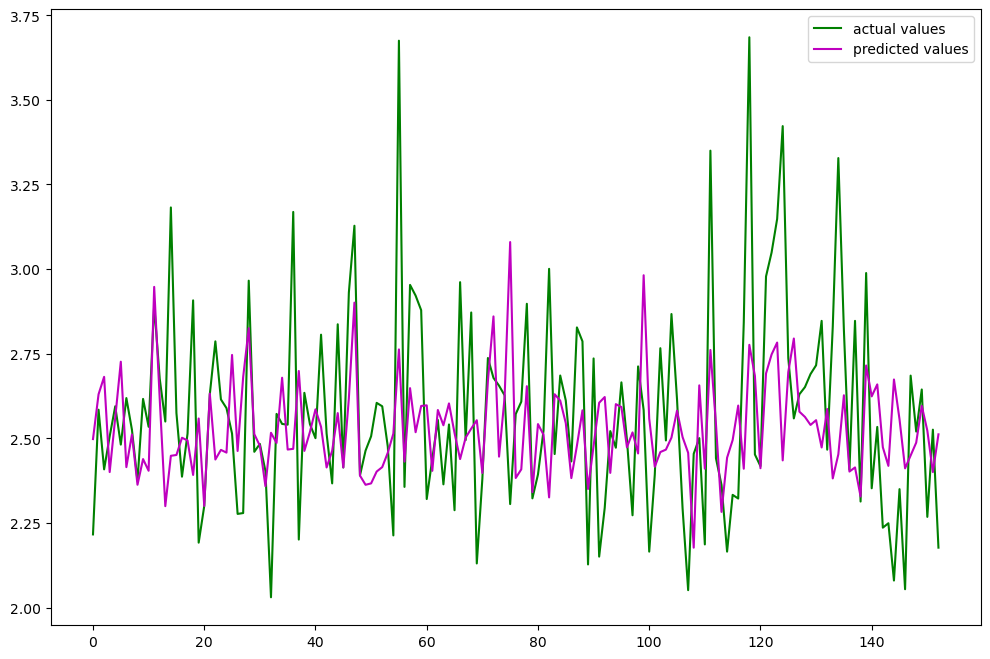

In [8]:
# importing the module
import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(12, 8))

# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")

# predicted values
plt.plot([i for i in range(len(y_test))],catboost_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(catboost_pred, y_test))
print(mean_squared_error(catboost_pred, y_test))

0.22273987059260084
0.08908596559734402


In [10]:
import pickle
pickle.dump(CatBoost_rg, open('model_N.pkl', 'wb'))


### CatBoost for K

In [11]:
# input and output variables
Input = data.drop('P', axis=1)
Input = Input.drop('K', axis=1)
Input = Input.drop('N', axis=1)
Output = data.K

# importing the module
from sklearn.model_selection import train_test_split

# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size=0.25)

In [12]:
# importing the CatBoot Regresspr
from catboost import CatBoostRegressor

# initializing the CatBoost regressor
CatBoost_rg = CatBoostRegressor()

# training the catboost Regressor model
CatBoost_rg.fit(X_train, y_train)

# making predictions
catboost_pred = CatBoost_rg.predict(X_test)

Learning rate set to 0.036178
0:	learn: 0.2221072	total: 1.54ms	remaining: 1.54s
1:	learn: 0.2214230	total: 2.23ms	remaining: 1.11s
2:	learn: 0.2206483	total: 2.85ms	remaining: 947ms
3:	learn: 0.2200427	total: 3.46ms	remaining: 860ms
4:	learn: 0.2195141	total: 4.05ms	remaining: 807ms
5:	learn: 0.2189574	total: 4.64ms	remaining: 770ms
6:	learn: 0.2184884	total: 5.27ms	remaining: 748ms
7:	learn: 0.2180514	total: 5.96ms	remaining: 739ms
8:	learn: 0.2175436	total: 6.62ms	remaining: 728ms
9:	learn: 0.2171073	total: 7.25ms	remaining: 718ms
10:	learn: 0.2167061	total: 7.93ms	remaining: 713ms
11:	learn: 0.2161179	total: 8.75ms	remaining: 721ms
12:	learn: 0.2156926	total: 9.44ms	remaining: 717ms
13:	learn: 0.2153287	total: 10.3ms	remaining: 724ms
14:	learn: 0.2149051	total: 10.9ms	remaining: 718ms
15:	learn: 0.2143756	total: 11.5ms	remaining: 708ms
16:	learn: 0.2140199	total: 12.1ms	remaining: 701ms
17:	learn: 0.2135591	total: 12.7ms	remaining: 691ms
18:	learn: 0.2133104	total: 13.4ms	remaining

240:	learn: 0.1708651	total: 173ms	remaining: 544ms
241:	learn: 0.1707527	total: 173ms	remaining: 543ms
242:	learn: 0.1706573	total: 174ms	remaining: 543ms
243:	learn: 0.1704364	total: 175ms	remaining: 542ms
244:	learn: 0.1703883	total: 176ms	remaining: 541ms
245:	learn: 0.1702273	total: 176ms	remaining: 540ms
246:	learn: 0.1701115	total: 177ms	remaining: 539ms
247:	learn: 0.1700097	total: 178ms	remaining: 539ms
248:	learn: 0.1699553	total: 178ms	remaining: 538ms
249:	learn: 0.1697700	total: 179ms	remaining: 537ms
250:	learn: 0.1697203	total: 180ms	remaining: 536ms
251:	learn: 0.1695559	total: 180ms	remaining: 535ms
252:	learn: 0.1693666	total: 181ms	remaining: 535ms
253:	learn: 0.1692856	total: 182ms	remaining: 534ms
254:	learn: 0.1692274	total: 183ms	remaining: 534ms
255:	learn: 0.1691798	total: 183ms	remaining: 533ms
256:	learn: 0.1691003	total: 184ms	remaining: 532ms
257:	learn: 0.1689569	total: 185ms	remaining: 532ms
258:	learn: 0.1688467	total: 186ms	remaining: 532ms
259:	learn: 

486:	learn: 0.1384450	total: 345ms	remaining: 363ms
487:	learn: 0.1381586	total: 346ms	remaining: 363ms
488:	learn: 0.1380460	total: 346ms	remaining: 362ms
489:	learn: 0.1379093	total: 347ms	remaining: 361ms
490:	learn: 0.1377855	total: 348ms	remaining: 361ms
491:	learn: 0.1376569	total: 349ms	remaining: 360ms
492:	learn: 0.1373401	total: 349ms	remaining: 359ms
493:	learn: 0.1371094	total: 350ms	remaining: 359ms
494:	learn: 0.1369559	total: 351ms	remaining: 358ms
495:	learn: 0.1368267	total: 352ms	remaining: 357ms
496:	learn: 0.1365414	total: 352ms	remaining: 357ms
497:	learn: 0.1363307	total: 353ms	remaining: 356ms
498:	learn: 0.1361276	total: 354ms	remaining: 355ms
499:	learn: 0.1359882	total: 355ms	remaining: 355ms
500:	learn: 0.1358886	total: 355ms	remaining: 354ms
501:	learn: 0.1357048	total: 356ms	remaining: 353ms
502:	learn: 0.1356257	total: 357ms	remaining: 352ms
503:	learn: 0.1356095	total: 357ms	remaining: 352ms
504:	learn: 0.1355427	total: 358ms	remaining: 351ms
505:	learn: 

724:	learn: 0.1109144	total: 518ms	remaining: 196ms
725:	learn: 0.1108970	total: 519ms	remaining: 196ms
726:	learn: 0.1108873	total: 519ms	remaining: 195ms
727:	learn: 0.1108664	total: 521ms	remaining: 194ms
728:	learn: 0.1107148	total: 521ms	remaining: 194ms
729:	learn: 0.1106994	total: 522ms	remaining: 193ms
730:	learn: 0.1106408	total: 523ms	remaining: 192ms
731:	learn: 0.1105814	total: 524ms	remaining: 192ms
732:	learn: 0.1105602	total: 524ms	remaining: 191ms
733:	learn: 0.1104261	total: 526ms	remaining: 191ms
734:	learn: 0.1103393	total: 527ms	remaining: 190ms
735:	learn: 0.1102893	total: 528ms	remaining: 189ms
736:	learn: 0.1102357	total: 528ms	remaining: 189ms
737:	learn: 0.1100542	total: 529ms	remaining: 188ms
738:	learn: 0.1099649	total: 530ms	remaining: 187ms
739:	learn: 0.1098955	total: 530ms	remaining: 186ms
740:	learn: 0.1098074	total: 531ms	remaining: 186ms
741:	learn: 0.1097578	total: 532ms	remaining: 185ms
742:	learn: 0.1094879	total: 532ms	remaining: 184ms
743:	learn: 

951:	learn: 0.0909679	total: 688ms	remaining: 34.7ms
952:	learn: 0.0909054	total: 689ms	remaining: 34ms
953:	learn: 0.0908241	total: 690ms	remaining: 33.3ms
954:	learn: 0.0907854	total: 691ms	remaining: 32.6ms
955:	learn: 0.0906918	total: 692ms	remaining: 31.8ms
956:	learn: 0.0906877	total: 693ms	remaining: 31.1ms
957:	learn: 0.0906299	total: 694ms	remaining: 30.4ms
958:	learn: 0.0905444	total: 695ms	remaining: 29.7ms
959:	learn: 0.0904363	total: 696ms	remaining: 29ms
960:	learn: 0.0903933	total: 696ms	remaining: 28.3ms
961:	learn: 0.0902923	total: 697ms	remaining: 27.5ms
962:	learn: 0.0901988	total: 698ms	remaining: 26.8ms
963:	learn: 0.0901189	total: 699ms	remaining: 26.1ms
964:	learn: 0.0899979	total: 699ms	remaining: 25.4ms
965:	learn: 0.0899404	total: 700ms	remaining: 24.7ms
966:	learn: 0.0898483	total: 701ms	remaining: 23.9ms
967:	learn: 0.0898019	total: 702ms	remaining: 23.2ms
968:	learn: 0.0897022	total: 703ms	remaining: 22.5ms
969:	learn: 0.0896968	total: 704ms	remaining: 21.8

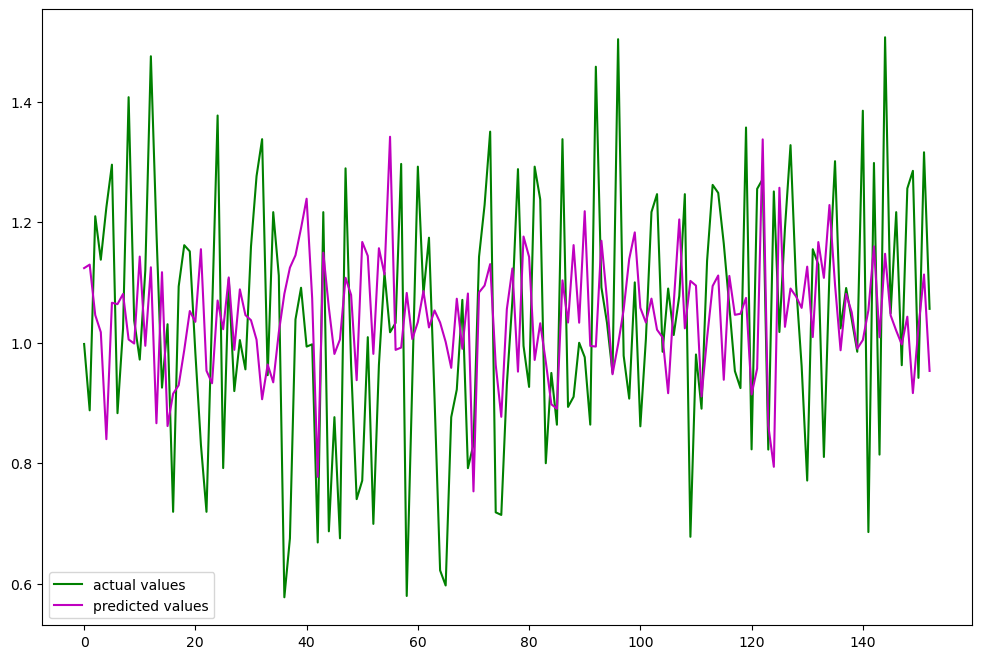

In [13]:
# importing the module
import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(12, 8))

# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")

# predicted values
plt.plot([i for i in range(len(y_test))],catboost_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [14]:
print(mean_absolute_error(catboost_pred, y_test))
print(mean_squared_error(catboost_pred, y_test))

0.17947183335854525
0.04783772159727581


In [15]:
pickle.dump(CatBoost_rg, open('model_K.pkl', 'wb'))

### CatBoost for P

In [16]:
# input and output variables
Input = data.drop('P', axis=1)
Input = Input.drop('K', axis=1)
Input = Input.drop('N', axis=1)
Output = data.P

# importing the module
from sklearn.model_selection import train_test_split

# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size=0.25)

In [17]:
# importing the CatBoot Regresspr
from catboost import CatBoostRegressor

# initializing the CatBoost regressor
CatBoost_rg = CatBoostRegressor()

# training the catboost Regressor model
CatBoost_rg.fit(X_train, y_train)

# making predictions
catboost_pred = CatBoost_rg.predict(X_test)

Learning rate set to 0.036178
0:	learn: 0.0140414	total: 893us	remaining: 893ms
1:	learn: 0.0140065	total: 2.02ms	remaining: 1.01s
2:	learn: 0.0139764	total: 2.75ms	remaining: 913ms
3:	learn: 0.0139402	total: 3.43ms	remaining: 855ms
4:	learn: 0.0139158	total: 4.16ms	remaining: 828ms
5:	learn: 0.0139002	total: 5.02ms	remaining: 832ms
6:	learn: 0.0138683	total: 5.98ms	remaining: 848ms
7:	learn: 0.0138467	total: 6.71ms	remaining: 831ms
8:	learn: 0.0138200	total: 7.35ms	remaining: 810ms
9:	learn: 0.0137882	total: 10.3ms	remaining: 1.01s
10:	learn: 0.0137642	total: 10.9ms	remaining: 979ms
11:	learn: 0.0137447	total: 12ms	remaining: 985ms
12:	learn: 0.0137317	total: 12.7ms	remaining: 964ms
13:	learn: 0.0137152	total: 13.3ms	remaining: 938ms
14:	learn: 0.0136937	total: 14.1ms	remaining: 926ms
15:	learn: 0.0136715	total: 14.8ms	remaining: 909ms
16:	learn: 0.0136539	total: 15.4ms	remaining: 893ms
17:	learn: 0.0136403	total: 16.2ms	remaining: 885ms
18:	learn: 0.0136186	total: 17.4ms	remaining: 8

210:	learn: 0.0113780	total: 170ms	remaining: 636ms
211:	learn: 0.0113658	total: 171ms	remaining: 635ms
212:	learn: 0.0113603	total: 172ms	remaining: 635ms
213:	learn: 0.0113444	total: 172ms	remaining: 633ms
214:	learn: 0.0113351	total: 173ms	remaining: 633ms
215:	learn: 0.0113285	total: 174ms	remaining: 632ms
216:	learn: 0.0113126	total: 175ms	remaining: 631ms
217:	learn: 0.0113053	total: 176ms	remaining: 630ms
218:	learn: 0.0112969	total: 176ms	remaining: 628ms
219:	learn: 0.0112863	total: 177ms	remaining: 627ms
220:	learn: 0.0112796	total: 178ms	remaining: 626ms
221:	learn: 0.0112662	total: 179ms	remaining: 626ms
222:	learn: 0.0112612	total: 180ms	remaining: 626ms
223:	learn: 0.0112557	total: 180ms	remaining: 625ms
224:	learn: 0.0112480	total: 181ms	remaining: 624ms
225:	learn: 0.0112409	total: 182ms	remaining: 623ms
226:	learn: 0.0112339	total: 183ms	remaining: 622ms
227:	learn: 0.0112172	total: 183ms	remaining: 621ms
228:	learn: 0.0112092	total: 184ms	remaining: 620ms
229:	learn: 

452:	learn: 0.0093576	total: 343ms	remaining: 415ms
453:	learn: 0.0093445	total: 344ms	remaining: 414ms
454:	learn: 0.0093387	total: 345ms	remaining: 413ms
455:	learn: 0.0093315	total: 345ms	remaining: 412ms
456:	learn: 0.0093253	total: 346ms	remaining: 411ms
457:	learn: 0.0093226	total: 347ms	remaining: 410ms
458:	learn: 0.0093175	total: 348ms	remaining: 410ms
459:	learn: 0.0093124	total: 348ms	remaining: 409ms
460:	learn: 0.0092942	total: 349ms	remaining: 408ms
461:	learn: 0.0092884	total: 350ms	remaining: 407ms
462:	learn: 0.0092782	total: 350ms	remaining: 406ms
463:	learn: 0.0092659	total: 351ms	remaining: 406ms
464:	learn: 0.0092564	total: 352ms	remaining: 405ms
465:	learn: 0.0092374	total: 353ms	remaining: 404ms
466:	learn: 0.0092226	total: 354ms	remaining: 404ms
467:	learn: 0.0092136	total: 354ms	remaining: 403ms
468:	learn: 0.0091975	total: 355ms	remaining: 402ms
469:	learn: 0.0091863	total: 356ms	remaining: 401ms
470:	learn: 0.0091743	total: 357ms	remaining: 400ms
471:	learn: 

681:	learn: 0.0075150	total: 516ms	remaining: 240ms
682:	learn: 0.0075084	total: 516ms	remaining: 240ms
683:	learn: 0.0075008	total: 517ms	remaining: 239ms
684:	learn: 0.0074986	total: 518ms	remaining: 238ms
685:	learn: 0.0074925	total: 519ms	remaining: 237ms
686:	learn: 0.0074876	total: 519ms	remaining: 237ms
687:	learn: 0.0074835	total: 520ms	remaining: 236ms
688:	learn: 0.0074687	total: 521ms	remaining: 235ms
689:	learn: 0.0074614	total: 522ms	remaining: 235ms
690:	learn: 0.0074559	total: 523ms	remaining: 234ms
691:	learn: 0.0074500	total: 524ms	remaining: 233ms
692:	learn: 0.0074437	total: 524ms	remaining: 232ms
693:	learn: 0.0074359	total: 525ms	remaining: 232ms
694:	learn: 0.0074238	total: 526ms	remaining: 231ms
695:	learn: 0.0074204	total: 528ms	remaining: 230ms
696:	learn: 0.0074133	total: 528ms	remaining: 230ms
697:	learn: 0.0074071	total: 529ms	remaining: 229ms
698:	learn: 0.0074058	total: 530ms	remaining: 228ms
699:	learn: 0.0073986	total: 531ms	remaining: 227ms
700:	learn: 

920:	learn: 0.0061333	total: 689ms	remaining: 59.1ms
921:	learn: 0.0061312	total: 690ms	remaining: 58.4ms
922:	learn: 0.0061240	total: 691ms	remaining: 57.7ms
923:	learn: 0.0061133	total: 692ms	remaining: 56.9ms
924:	learn: 0.0061086	total: 692ms	remaining: 56.1ms
925:	learn: 0.0061022	total: 693ms	remaining: 55.4ms
926:	learn: 0.0060916	total: 694ms	remaining: 54.6ms
927:	learn: 0.0060875	total: 695ms	remaining: 53.9ms
928:	learn: 0.0060813	total: 695ms	remaining: 53.1ms
929:	learn: 0.0060688	total: 696ms	remaining: 52.4ms
930:	learn: 0.0060627	total: 697ms	remaining: 51.6ms
931:	learn: 0.0060548	total: 697ms	remaining: 50.9ms
932:	learn: 0.0060448	total: 698ms	remaining: 50.1ms
933:	learn: 0.0060408	total: 699ms	remaining: 49.4ms
934:	learn: 0.0060358	total: 700ms	remaining: 48.6ms
935:	learn: 0.0060299	total: 700ms	remaining: 47.9ms
936:	learn: 0.0060260	total: 701ms	remaining: 47.1ms
937:	learn: 0.0060206	total: 702ms	remaining: 46.4ms
938:	learn: 0.0060139	total: 703ms	remaining: 

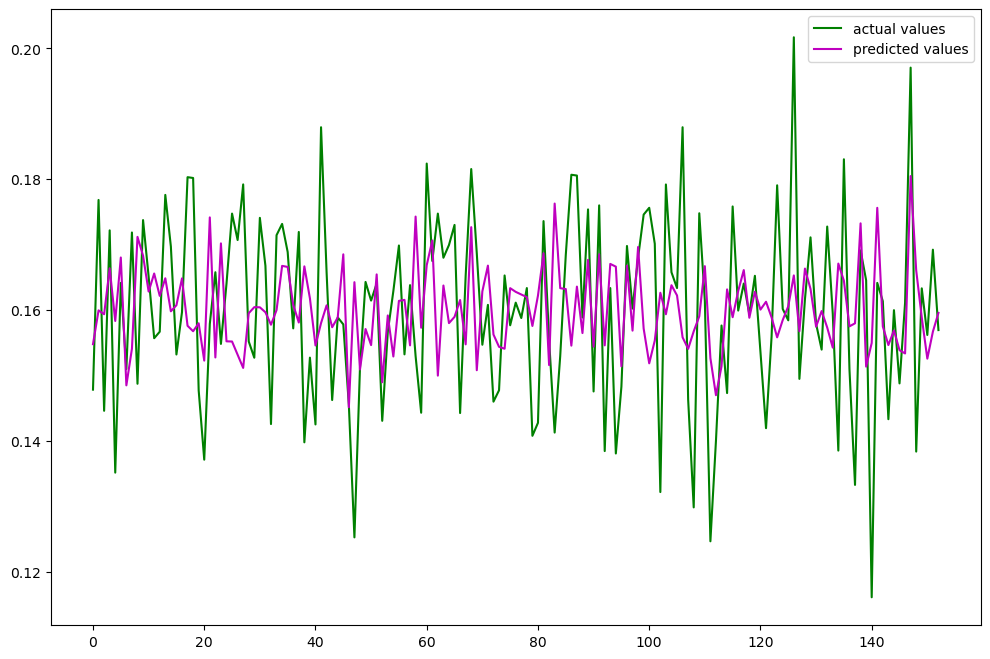

In [18]:
# importing the module
import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(12, 8))

# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")

# predicted values
plt.plot([i for i in range(len(y_test))],catboost_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [19]:
print(mean_absolute_error(catboost_pred, y_test))
print(mean_squared_error(catboost_pred, y_test))

0.01147434799320932
0.0002113192992538698


In [20]:
pickle.dump(CatBoost_rg, open('model_P.pkl', 'wb'))

In [21]:
import rasterio

def extract_bands(image_path):
    with rasterio.open(image_path) as src:
        # Read the satellite image data
        image_data = src.read()

        # Extract individual bands
        band1 = image_data[0]  # Band 1
        band2 = image_data[1]  # Band 2
        band3 = image_data[2]  # Band 3
        band4 = image_data[3]  # Band 4

    return band1, band2, band3, band4

# Example usage
image_path = "image.tif"

band1, band2, band3, band4 = extract_bands(image_path)

In [22]:
print(band1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


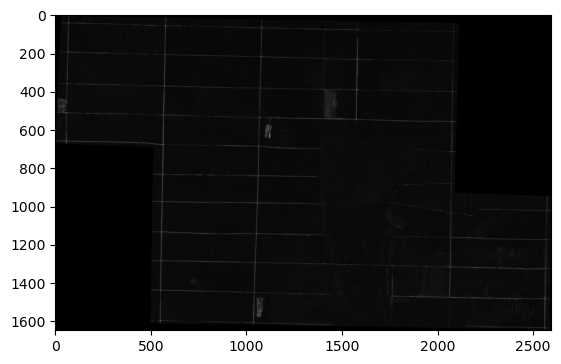

In [23]:
import matplotlib.pyplot as plt
plt.imshow(band1, cmap='gray')
plt.show()


In [31]:
import rasterio
import numpy as np
raster = rasterio.open("image.tif")
bands = raster.read()

red_band = bands[0].astype(float)
nir_band = bands[3].astype(float)
ndvi = (nir_band - red_band) / (nir_band + red_band + 1e-8)

ndvi_band = np.expand_dims(ndvi, axis=0)
dataset = np.concatenate((bands, ndvi_band), axis=0)
raster_transform = raster.transform

In [32]:
import geopandas as gpd

shapefile = gpd.read_file("file/SAMPLE_GESER/Sampel_LSU_DATA_PREDIKSI.shp")

In [33]:
df = pd.DataFrame(columns=['band1', 'band2', 'band3', 'band4'])
for index, row in shapefile.iterrows():
    
        row, col = rasterio.transform.rowcol(raster_transform, row['geometry'].x, row['geometry'].y)

        # Get the band values at the pixel
        band1 = dataset[0, row, col]
        band2 = dataset[1, row, col]
        band3 = dataset[2, row, col]
        band4 = dataset[3, row, col]
        ndvi = dataset[4, row, col]

        # Add the coordinates and the band values to the dataframe
        df = df.append({'band1': band1, 'band2': band2, 'band3': band3, 'band4': band4, 'ndvi': ndvi}, ignore_index=True)

/tmp/ipykernel_3413166/3243594028.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'band1': band1, 'band2': band2, 'band3': band3, 'band4': band4, 'ndvi': ndvi}, ignore_index=True)
/tmp/ipykernel_3413166/3243594028.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'band1': band1, 'band2': band2, 'band3': band3, 'band4': band4, 'ndvi': ndvi}, ignore_index=True)
/tmp/ipykernel_3413166/3243594028.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'band1': band1, 'band2': band2, 'band3': band3, 'band4': band4, 'ndvi': ndvi}, ignore_index=True)
/tmp/ipykernel_3413166/3243594028.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

/tmp/ipykernel_3413166/3243594028.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'band1': band1, 'band2': band2, 'band3': band3, 'band4': band4, 'ndvi': ndvi}, ignore_index=True)
/tmp/ipykernel_3413166/3243594028.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'band1': band1, 'band2': band2, 'band3': band3, 'band4': band4, 'ndvi': ndvi}, ignore_index=True)
/tmp/ipykernel_3413166/3243594028.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'band1': band1, 'band2': band2, 'band3': band3, 'band4': band4, 'ndvi': ndvi}, ignore_index=True)
/tmp/ipykernel_3413166/3243594028.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

/tmp/ipykernel_3413166/3243594028.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'band1': band1, 'band2': band2, 'band3': band3, 'band4': band4, 'ndvi': ndvi}, ignore_index=True)
/tmp/ipykernel_3413166/3243594028.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'band1': band1, 'band2': band2, 'band3': band3, 'band4': band4, 'ndvi': ndvi}, ignore_index=True)
/tmp/ipykernel_3413166/3243594028.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'band1': band1, 'band2': band2, 'band3': band3, 'band4': band4, 'ndvi': ndvi}, ignore_index=True)
/tmp/ipykernel_3413166/3243594028.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

In [37]:
import pickle
file = open('model_K.pkl', 'rb')
model = pickle.load(file)
predictions = model.predict(df)


In [41]:
import pickle
def prediction(path, model_path):
    
    # reading the shapefile
    shapefile = gpd.read_file(path)
    
    df = pd.DataFrame(columns=['band1', 'band2', 'band3', 'band4'])
    for index, row in shapefile.iterrows():

            row, col = rasterio.transform.rowcol(raster_transform, row['geometry'].x, row['geometry'].y)

            # Get the band values at the pixel
            band1 = dataset[0, row, col]
            band2 = dataset[1, row, col]
            band3 = dataset[2, row, col]
            band4 = dataset[3, row, col]
            ndvi = dataset[4, row, col]

            # Add the coordinates and the band values to the dataframe
            df = df.append({'band1': band1, 'band2': band2, 'band3': band3, 'band4': band4, 'ndvi': ndvi}, ignore_index=True)
    
      # Load the pickled model
    with open(model_path, "rb") as f:
        model = pickle.load(f)

      #Predict
    predictions = model.predict(df)
    result = predictions.reshape(bands.shape[1:])


    return bands
    

In [42]:
path = 'file/SAMPLE_GESER/Sampel_LSU_DATA_PREDIKSI.shp'
model_path = 'model_K.pkl'

output = prediction(path, model_path)

/tmp/ipykernel_3413166/3091289063.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'band1': band1, 'band2': band2, 'band3': band3, 'band4': band4, 'ndvi': ndvi}, ignore_index=True)
/tmp/ipykernel_3413166/3091289063.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'band1': band1, 'band2': band2, 'band3': band3, 'band4': band4, 'ndvi': ndvi}, ignore_index=True)
/tmp/ipykernel_3413166/3091289063.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'band1': band1, 'band2': band2, 'band3': band3, 'band4': band4, 'ndvi': ndvi}, ignore_index=True)
/tmp/ipykernel_3413166/3091289063.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

/tmp/ipykernel_3413166/3091289063.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'band1': band1, 'band2': band2, 'band3': band3, 'band4': band4, 'ndvi': ndvi}, ignore_index=True)
/tmp/ipykernel_3413166/3091289063.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'band1': band1, 'band2': band2, 'band3': band3, 'band4': band4, 'ndvi': ndvi}, ignore_index=True)
/tmp/ipykernel_3413166/3091289063.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'band1': band1, 'band2': band2, 'band3': band3, 'band4': band4, 'ndvi': ndvi}, ignore_index=True)
/tmp/ipykernel_3413166/3091289063.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

/tmp/ipykernel_3413166/3091289063.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'band1': band1, 'band2': band2, 'band3': band3, 'band4': band4, 'ndvi': ndvi}, ignore_index=True)
/tmp/ipykernel_3413166/3091289063.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'band1': band1, 'band2': band2, 'band3': band3, 'band4': band4, 'ndvi': ndvi}, ignore_index=True)
/tmp/ipykernel_3413166/3091289063.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'band1': band1, 'band2': band2, 'band3': band3, 'band4': band4, 'ndvi': ndvi}, ignore_index=True)
/tmp/ipykernel_3413166/3091289063.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

ValueError: cannot reshape array of size 610 into shape (1648,2595)

In [69]:
bands.shape[1:]

(1648, 2595)